In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
bikes=pd.read_csv('day_cleaned.csv')

In [3]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,2018,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,2018,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,2018,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,2018,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,1600


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


In [5]:
#convert dteday to datetime
bikes['dteday']=pd.to_datetime(bikes['dteday'],format='%Y-%m-%d')

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 74.3+ KB


In [17]:
bikes['yr']=bikes['yr'].astype('category')

In [18]:
bikes.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
298,2018-10-26,winter,2018,Oct,0,Wed,1,B,19.850847,23.64230,72.0417,9.959014,3894
592,2019-08-16,fall,2019,Aug,0,Thu,1,A,29.485847,32.73440,51.9167,9.500332,7605
515,2019-05-31,summer,2019,May,0,Thu,1,A,27.880000,31.56645,49.2917,13.083693,7338
253,2018-09-11,fall,2018,Sep,0,Sun,0,A,26.786653,30.46145,71.3750,7.708618,5046
505,2019-05-21,summer,2019,May,0,Mon,1,B,24.531653,28.28335,81.1250,15.624668,4359


# Data Visualisation and Analysis

*** Checking Distribution of numerical columns ***

<AxesSubplot:xlabel='temp', ylabel='Density'>

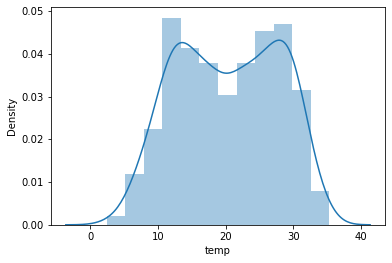

In [8]:
#check distribution of temparature
sns.distplot(bikes['temp'])

<AxesSubplot:xlabel='atemp', ylabel='Density'>

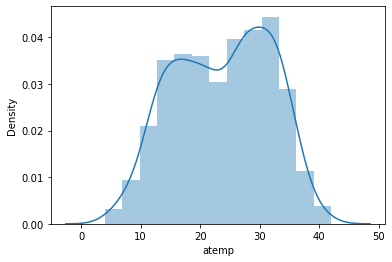

In [9]:
#check distribution of feeling temparature
sns.distplot(bikes['atemp'])

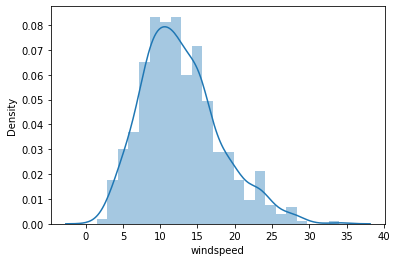

In [10]:
# windspeed
sns.distplot(bikes['windspeed'])
plt.show()

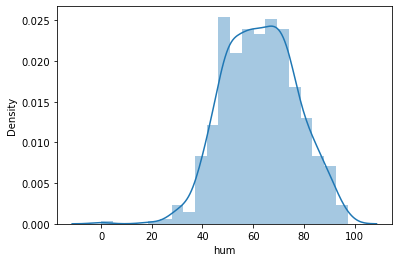

In [11]:
# humidity
sns.distplot(bikes['hum'])
plt.show()

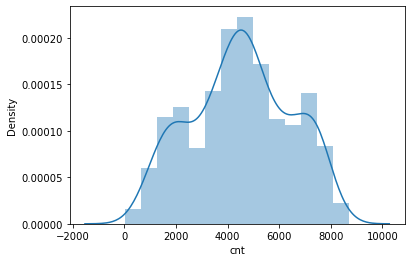

In [12]:
# cnt
sns.distplot(bikes['cnt'])
plt.show()

In [13]:
bikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    category      
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 69.4+ KB


In [20]:
#get categorical columns
bikes_cat=bikes.select_dtypes(exclude=['int64','float64','datetime64'])

In [21]:
bikes_cat

,season,yr,mnth,weekday,weathersit
0,spring,2018,Jan,Sat,B
1,spring,2018,Jan,Sun,B
2,spring,2018,Jan,Mon,A
3,spring,2018,Jan,Tue,A
4,spring,2018,Jan,Wed,A
...,...,...,...,...,...
725,spring,2019,Dec,Thu,B
726,spring,2019,Dec,Fri,B
727,spring,2019,Dec,Sat,B
728,spring,2019,Dec,Sun,A


In [32]:
cols=bikes.columns.tolist()
cat_cols=bikes_cat.columns.tolist()

In [33]:
cat_cols

['season', 'yr', 'mnth', 'weekday', 'weathersit']

In [43]:
#numeric_cols=[x for x in cols if x not in cat_cols]
numeric_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [44]:
bikes_num=bikes[numeric_cols]

In [47]:
bikes_num

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


In [46]:
numeric_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

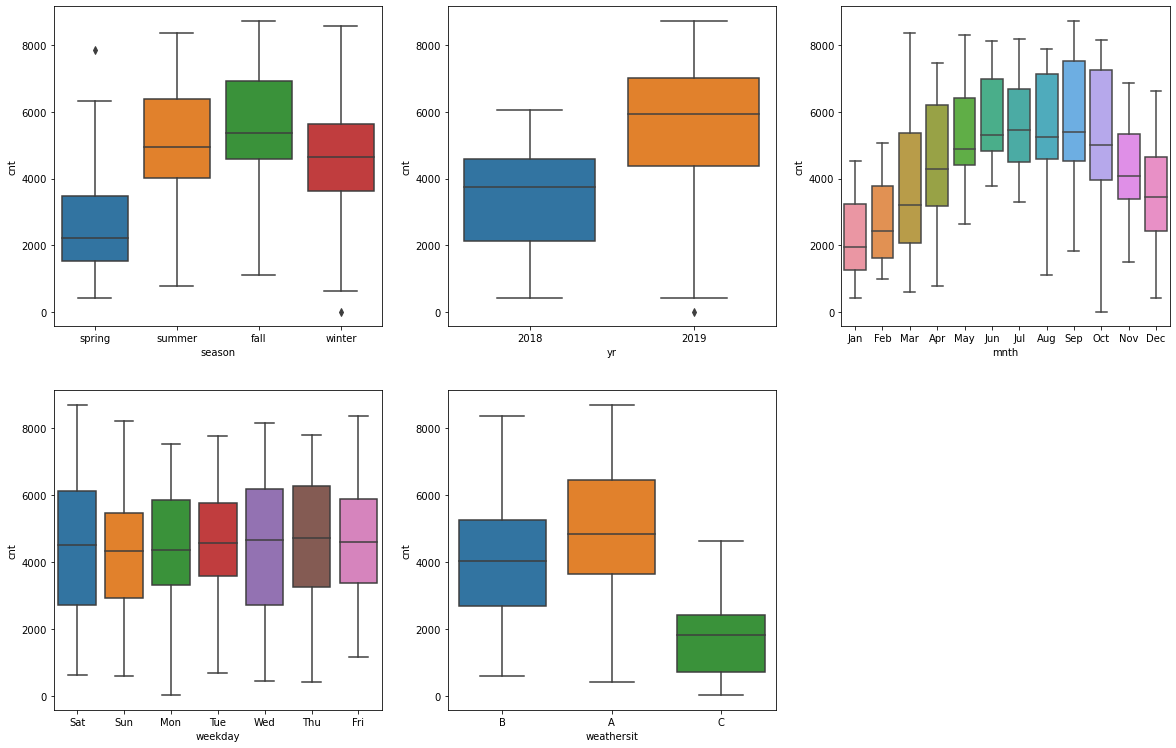

In [57]:
#visualising categorical variables
i=1
plt.figure(figsize=(20, 20)) 
for x in cat_cols:
    plt.subplot(3,3,i)
    sns.boxplot(x=str(x),y='cnt',data=bikes)
    i=i+1
plt.show()

##### Analysis:
- It can be seen that the counts increases during summer an fall and lower in spring and winter.
- The same can also be supported from the month wise boxplot which shows higher median during June-Sep compare to other months
- The bookings are higher during clear and misty weather
- There is almost similar distribution for all weekdays
- There are increase in booking in 2019 compared to 2018



- 1: Clear, Few clouds, Partly cloudy, Partly cloudy--A
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist--B
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds--C
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog--D

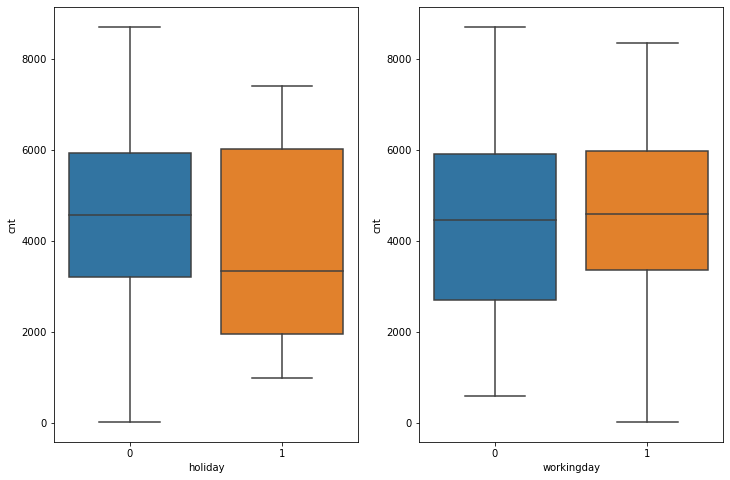

In [70]:
plt.figure(figsize=(12, 8)) 
plt.subplot(1,2,1)
sns.boxplot(x='holiday',y='cnt',data=bikes)

plt.subplot(1,2,2)
sns.boxplot(x='workingday',y='cnt',data=bikes)

plt.show()

- The count is similar where it is a working day or not
- The median is higher when it is not a holiday

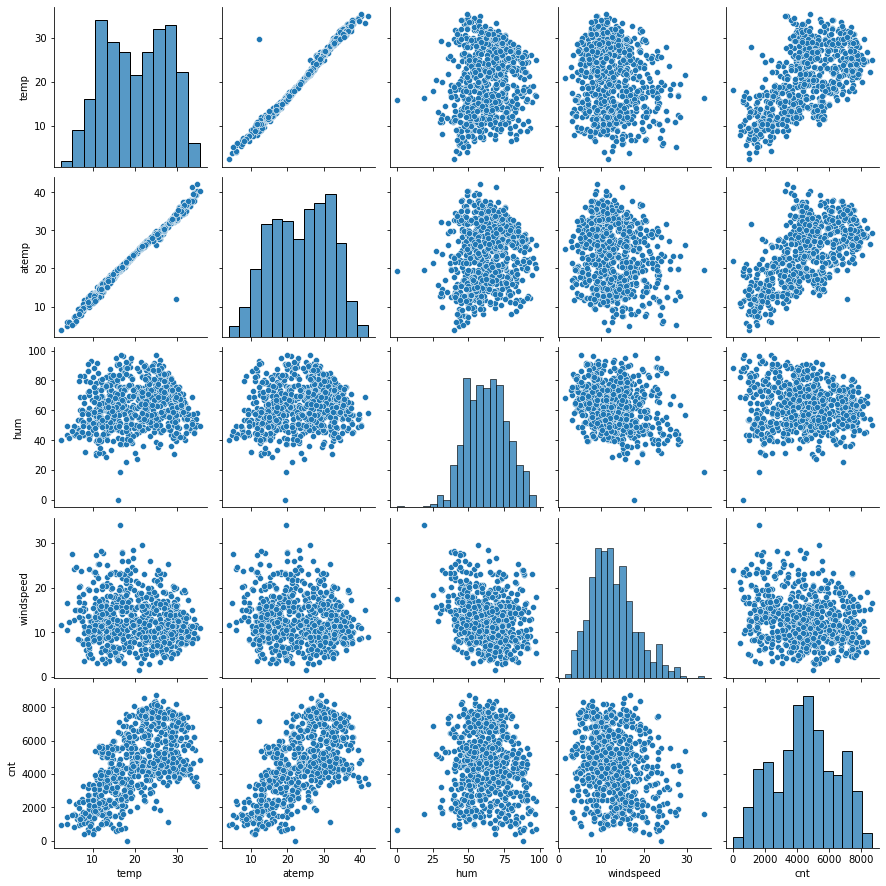

In [52]:
#visualising numeric data
sns.pairplot(bikes_num)
plt.show()

In [53]:
#get a correlation matrix
cor=bikes_num.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


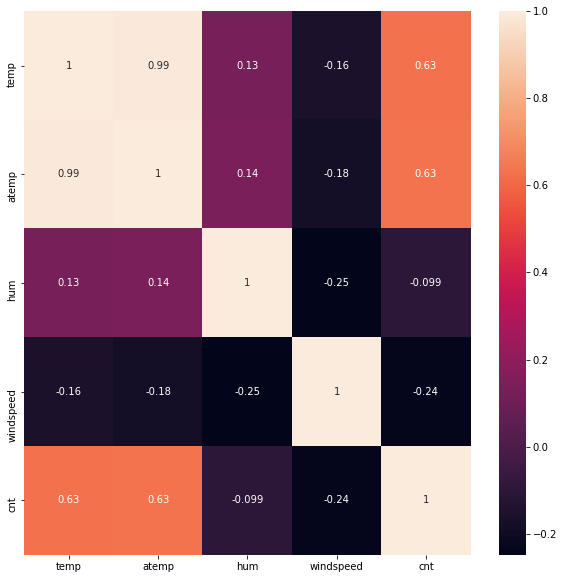

In [59]:
#plot a heatmap
plt.figure(figsize=(10, 10)) 
sns.heatmap(cor,annot=True)
plt.show()

- There are high correlation between atemp and temp. So we would drop one of them to avoid multicollinearity

In [73]:
bikes.drop(columns='atemp',inplace=True)

In [74]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,985
1,2018-01-02,spring,2018,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,801
2,2018-01-03,spring,2018,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,1349
3,2018-01-04,spring,2018,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,1562
4,2018-01-05,spring,2018,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,1600


# Data Preparation

In [75]:
#get categorical vars
bikes_cat

,season,yr,mnth,weekday,weathersit
0,spring,2018,Jan,Sat,B
1,spring,2018,Jan,Sun,B
2,spring,2018,Jan,Mon,A
3,spring,2018,Jan,Tue,A
4,spring,2018,Jan,Wed,A
...,...,...,...,...,...
725,spring,2019,Dec,Thu,B
726,spring,2019,Dec,Fri,B
727,spring,2019,Dec,Sat,B
728,spring,2019,Dec,Sun,A


In [76]:
#create dummy variables
bikes_cat_dummies=pd.get_dummies(bikes_cat,drop_first=True)


In [77]:
bikes_cat_dummies

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
bikes_master=pd.concat([bikes,bikes_cat_dummies],axis=1)

In [80]:
bikes_master.drop(columns=cat_cols,inplace=True)

In [81]:
bikes_master

,dteday,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,2018-01-01,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2018-01-02,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2018-01-03,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018-01-04,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018-01-05,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,1,0,0,1,0
726,2019-12-28,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,1,0
727,2019-12-29,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,2019-12-30,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
bikes_master.drop(columns='dteday',inplace=True)

In [85]:
bikes_master.to_csv('bikes_data_for_model.csv',index=False)